#### 1.

Przypomnij sobie z wykładu, w jaki sposób możemy łączyć klasyfikatory ze sobą (kilka architektur) oraz co jest niezbędne (jakie warunki muszą być spełnione) do tego, żeby takie połączenia działały skuteczniej od ich elementów składowych.

Nawiązując do informacji z wykładu przeczytaj dokumentację pakietu scikit-learn na temat metod zespołowych w klasyfikacji (pomiń regresję; skup się tylko na BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier i StackingClassifier).

Pobierz zbiór danych o nazwie odpowiadającej Twojemu numerowi albumu i przeprowadź jego wstępną eksplorację: 
1. proporcja klas, 
1. liczba i rodzaje atrybutów, 
1. ich zakresy i rozkłady wartości. 

Pokaż rozkłady wartości wszystkich atrybutów obok siebie na jednym szerokim wykresie pudełkowym lub skrzypcowym; na osi poziomej umieść nazwy atrybutów. Opisując wnioski (wystarczy kilka zdań) możesz pogrupować (o ile to możliwe) atrybuty pisząc np. "73 atrybuty są takie a takie, 22 atrybuty charakteryzują się tym a tym, wyjątkowy jest atrybut taki a taki", itp.

Proporcje klas:
class
0    0.9566
1    0.0434
Name: proportion, dtype: float64
Liczba przypadków: 10000
Liczba atrybutów (bez klasy): 125
Typy danych atrybutów:
float64    125
int64        1
Name: count, dtype: int64
Zakresy wartości (min, max) dla pierwszych 5 atrybutów:
             min       max
dissim  0.001621  0.021008
el0     0.035086  0.975680
el1     0.040630  0.913040
el2     0.047816  0.963770
el3     0.039330  0.908120
Zakresy wartości (min, max) dla pierwszych 5 atrybutów:
             min       max
dissim  0.001621  0.021008
el0     0.035086  0.975680
el1     0.040630  0.913040
el2     0.047816  0.963770
el3     0.039330  0.908120


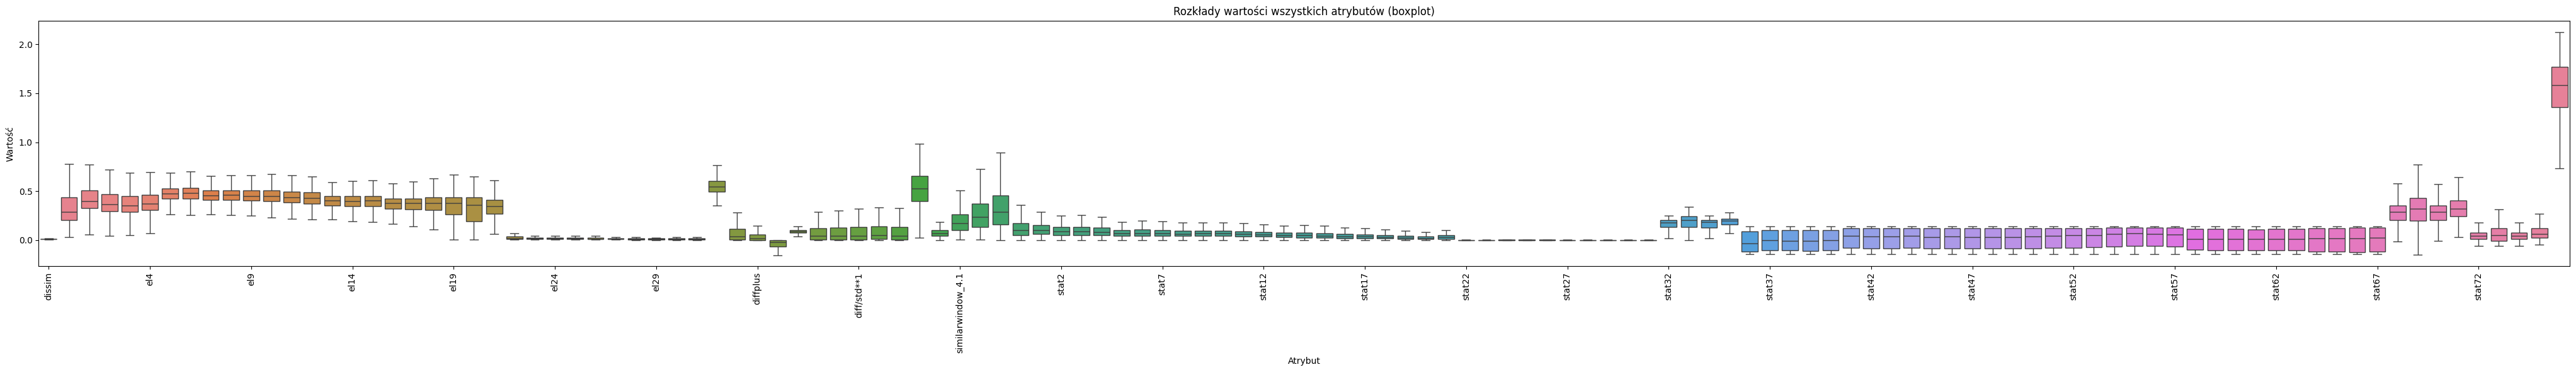

In [1]:
# Eksploracja zbioru danych: 162961-ensembles.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych
file = '162961-ensembles.txt'
data = pd.read_csv(file, sep='\t')

# Proporcja klas
print('Proporcje klas:')
print(data['class'].value_counts(normalize=True))

# Liczba i typy atrybutów
n_rows, n_cols = data.shape
print(f'Liczba przypadków: {n_rows}')
print(f'Liczba atrybutów (bez klasy): {n_cols-1}')
print('Typy danych atrybutów:')
print(data.dtypes.value_counts())

# Zakresy wartości atrybutów
desc = data.describe().T
print('Zakresy wartości (min, max) dla pierwszych 5 atrybutów:')
print(desc[['min','max']].head())

# Rozkłady wartości wszystkich atrybutów (boxplot)
plt.figure(figsize=(max(16, (n_cols-1)//3), 6))
sns.boxplot(data=data.drop(columns=['class']), orient='v', showfliers=False)
plt.title('Rozkłady wartości wszystkich atrybutów (boxplot)')
plt.xlabel('Atrybut')
plt.ylabel('Wartość')
plt.xticks(ticks=np.arange(0, n_cols-1, 5), labels=data.columns[:-1][::5], rotation=90)
plt.tight_layout()
plt.show()

#### Wnioski z eksploracji
- W zbiorze jest 125 atrybutów opisujących przypadki, wszystkie są typu numerycznego (float64), a kolumna 'class' jest typu całkowitego (int64).
- Proporcje klas: klasa 0 stanowi 95.66%, klasa 1 – 4.34%. Zbiór jest silnie niezbalansowany.
- Liczba przypadków: 10 000.
- Większość atrybutów ma wartości w zakresie od ok. 0.0016 do 0.98, ale niektóre cechy mają znacznie mniejsze zakresy (np. poniżej 0.05) lub wartości odstające.
- Rozkłady atrybutów są bardzo zróżnicowane: część cech ma rozkład symetryczny, inne są skośne lub mają wartości odstające. Widać grupy cech o podobnych rozkładach (np. el0–el31, stat0–stat77), a także pojedyncze cechy o bardzo szerokim rozrzucie.
- Przykładowo: wiele atrybutów (szczególnie z grupy el* i stat*) ma niewielką zmienność, natomiast niektóre cechy (np. max_el, maxmiddle) mają wyraźnie większy rozrzut.
- Klasa 0 (normalna) jest zdecydowanie liczniejsza, co należy uwzględnić przy dalszej analizie i doborze metryk.

#### 2.

Stosując wiedzę nabytą na wcześniejszym laboratorium z transformacji przestrzeni atrybutów, zwizualizuj ten zbiór w 2D i 3D podając procent wariancji zachowany przy rzutowaniu oryginalnej przestrzeni do 2D i 3D. Na wykresach pokaż przypadki obu klas jako kropki o dwóch różnych kolorach. Rozwiąż ewentualny problem zasłaniania kropek, na czym może cierpieć mniej liczna klasa. Czy na podstawie tej wizualizacji możesz dostrzec pole do współpracy różnych klasyfikatorów – czy pewne fragmenty przestrzeni wydają się trudne dla jednych metod, a proste dla innych? Czy ten rodzaj wizualizacji uprawnia do wyciągania tego typu wniosków?

Procent wariancji zachowany w 2D: 40.84%


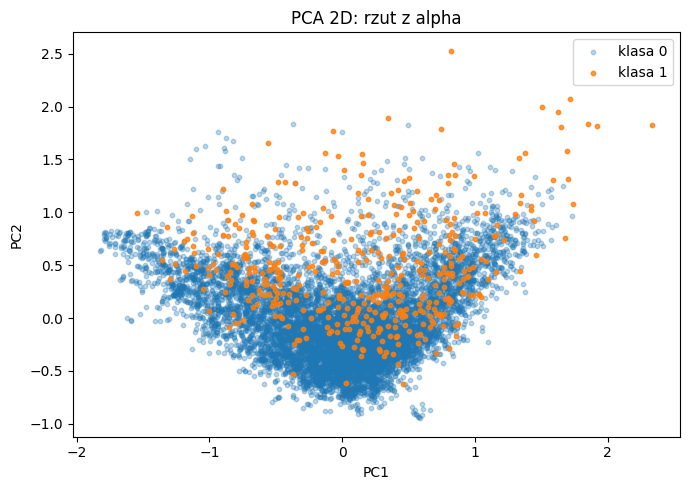

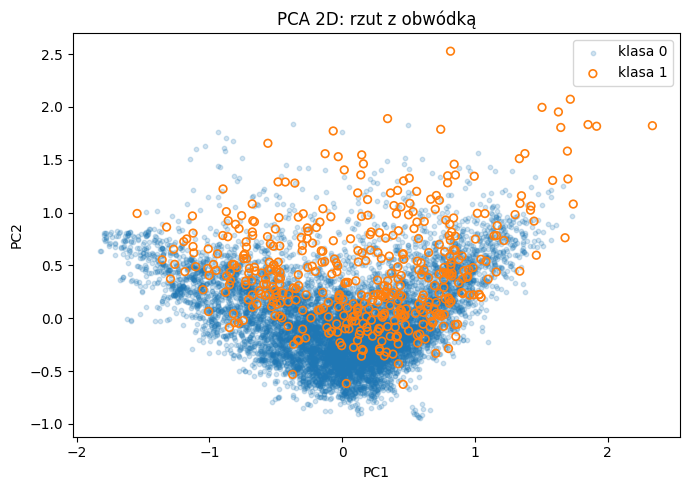

Procent wariancji zachowany w 3D: 50.33%


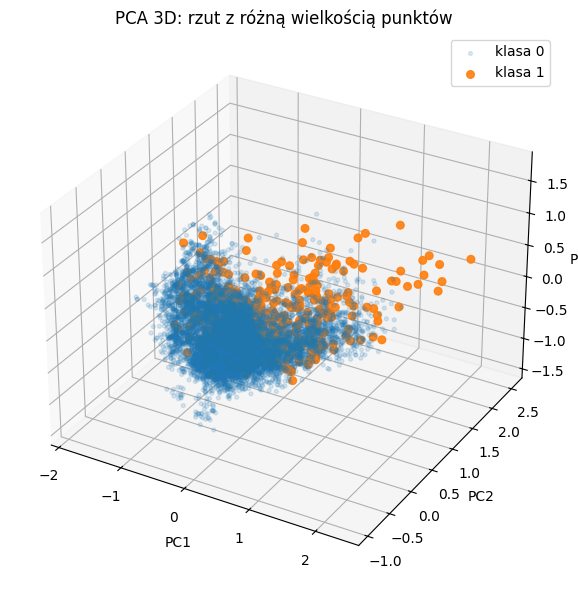

In [2]:
# PCA 2D i 3D: wizualizacja oraz procent zachowanej wariancji
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

X = data.drop(columns=['class'])
y = data['class']

# PCA 2D
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X)
var2 = np.sum(pca2.explained_variance_ratio_)
print(f'Procent wariancji zachowany w 2D: {var2*100:.2f}%')

plt.figure(figsize=(7,5))
# Sposób 1: alpha (przezroczystość)
for label, color in zip([0,1], ['tab:blue','tab:orange']):
    plt.scatter(X_pca2[y==label,0], X_pca2[y==label,1],
                label=f'klasa {label}', alpha=0.3 if label==0 else 0.8, s=10)
plt.title('PCA 2D: rzut z alpha')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.tight_layout()
plt.show()

# Sposób 2: outline (obwódka dla klasy mniejszościowej)
plt.figure(figsize=(7,5))
plt.scatter(X_pca2[y==0,0], X_pca2[y==0,1], c='tab:blue', label='klasa 0', alpha=0.2, s=10)
plt.scatter(X_pca2[y==1,0], X_pca2[y==1,1], facecolors='none', edgecolors='tab:orange', label='klasa 1', s=30, linewidths=1.2)
plt.title('PCA 2D: rzut z obwódką')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.tight_layout()
plt.show()

# PCA 3D
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X)
var3 = np.sum(pca3.explained_variance_ratio_)
print(f'Procent wariancji zachowany w 3D: {var3*100:.2f}%')

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
# Sposób 3: mniejsze punkty dla klasy większościowej
ax.scatter(X_pca3[y==0,0], X_pca3[y==0,1], X_pca3[y==0,2], c='tab:blue', label='klasa 0', alpha=0.15, s=8)
ax.scatter(X_pca3[y==1,0], X_pca3[y==1,1], X_pca3[y==1,2], c='tab:orange', label='klasa 1', alpha=0.9, s=30)
ax.set_title('PCA 3D: rzut z różną wielkością punktów')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.tight_layout()
plt.show()

**Podsumowanie:**
- W 2D zachowuje się ok. 40.84% wariancji, w 3D ok. 50.33%.
- Klasy są mocno wymieszane, nie widać wyraźnych skupisk klasy 1 (anomalii), co sugeruje, że klasyfikacja będzie trudna dla prostych modeli liniowych.
- Zasłanianie kropek rozwiązano przez: (1) przezroczystość, (2) obwódkę, (3) różną wielkość i alpha w 3D.
- Wizualizacja PCA nie pozwala jednoznacznie wskazać fragmentów przestrzeni, które byłyby łatwe/trudne dla konkretnych klasyfikatorów – separacja klas jest słaba, więc nie widać wyraźnych granic.
- Tego typu wizualizacja daje ogólne pojęcie o trudności zadania, ale nie pozwala przewidzieć, które metody zespołowe będą skuteczniejsze – do tego potrzebna jest dalsza analiza i testy modeli.

#### 3.

Przejrzyj dokumentację RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier. Które z nich mają parametr n_estimators? Czym on się różni od parametru estimators oraz estimator/base_estimator? Pamiętaj o różnorodnych, poznanych do tej pory klasyfikatorach – DecisionTreeClassifier, SVC, MLPClassifier, GaussianNB i QuadraticDiscriminantAnalysis.

**RandomForestClassifier** i **AdaBoostClassifier** mają parametr `n_estimators` (liczba drzew lub słabych klasyfikatorów). 

`VotingClassifier` i `StackingClassifier` nie mają `n_estimators`, tylko `estimators` (lista klasyfikatorów do połączenia). 

`n_estimators` to liczba powtarzanych modeli, `estimators` to lista modeli, a `estimator`/`base_estimator` to pojedynczy model powielany w ensemble. 

Klasyczne klasyfikatory jak DecisionTreeClassifier, SVC, MLPClassifier, GaussianNB, QDA nie mają tych parametrów, bo nie są ensemble.

#### 4.

Postaraj się uzyskać na swoim zbiorze danych jak najwyższą trafność klasyfikacji za pomocą czterech wymienionych w poprzednim punkcie metod zespołowych. Używaj oryginalnych (niezmienionych) atrybutów. W przypadku AdaBoost, Voting i Stacking poeksperymentuj z różnymi zestawami bazowych klasyfikatorów (przynajmniej dwie próby na jedną architekturę) – to może być iteracyjna praca, polegająca na odkrywaniu, które klasyfikatory nawzajem sobie pomagają podnosząc jakość klasyfikacji. Tę jakość oceniaj za pomocą G-mean techniką 10-fold stratified CV. Przy średniej z CV zawsze podawaj/pokazuj jej odchylenie standardowe. Opisz przeprowadzone próby i wyciągnij wnioski.

In [3]:
# Importy
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.metrics import geometric_mean_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Funkcja do oceny G-mean w CV
def gmean_cv(clf, X, y, cv=10):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    scores = []
    for train, test in skf.split(X, y):
        clf.fit(X.iloc[train], y.iloc[train])
        y_pred = clf.predict(X.iloc[test])
        scores.append(geometric_mean_score(y.iloc[test], y_pred))
    return np.mean(scores), np.std(scores)

X = data.drop(columns=['class'])
y = data['class']

# RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
gmean_rf, std_rf = gmean_cv(rf, X, y)
print(f'RandomForest: G-mean={gmean_rf:.4f} ± {std_rf:.4f}')

# AdaBoost - próba 1: DecisionTree (max_depth=1)
adb1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
gmean_adb1, std_adb1 = gmean_cv(adb1, X, y)
print(f'AdaBoost (pniaki): G-mean={gmean_adb1:.4f} ± {std_adb1:.4f}')

# AdaBoost - próba 2: DecisionTree (max_depth=3)
adb2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=42)
gmean_adb2, std_adb2 = gmean_cv(adb2, X, y)
print(f'AdaBoost (drzewa gł.3): G-mean={gmean_adb2:.4f} ± {std_adb2:.4f}')

# Voting - próba 1: drzewo, SVC, MLP
vote1 = VotingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(30,), max_iter=300, random_state=42))
], voting='soft', n_jobs=-1)
gmean_vote1, std_vote1 = gmean_cv(vote1, X, y)
print(f'Voting (drzewo, SVC, MLP): G-mean={gmean_vote1:.4f} ± {std_vote1:.4f}')

# Voting - próba 2: drzewo, GaussianNB, SVC
vote2 = VotingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('gnb', GaussianNB()),
    ('svc', SVC(probability=True, random_state=42))
], voting='soft', n_jobs=-1)
gmean_vote2, std_vote2 = gmean_cv(vote2, X, y)
print(f'Voting (drzewo, GNB, SVC): G-mean={gmean_vote2:.4f} ± {std_vote2:.4f}')

# Stacking - próba 1: drzewo, SVC, meta: MLP
stack1 = StackingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
], final_estimator=MLPClassifier(hidden_layer_sizes=(30,), max_iter=300, random_state=42), n_jobs=-1, passthrough=True)
gmean_stack1, std_stack1 = gmean_cv(stack1, X, y)
print(f'Stacking (drzewo, SVC, meta MLP): G-mean={gmean_stack1:.4f} ± {std_stack1:.4f}')

# Stacking - próba 2: drzewo, GNB, meta: SVC
stack2 = StackingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('gnb', GaussianNB())
], final_estimator=SVC(probability=True, random_state=42), n_jobs=-1, passthrough=True)
gmean_stack2, std_stack2 = gmean_cv(stack2, X, y)
print(f'Stacking (drzewo, GNB, meta SVC): G-mean={gmean_stack2:.4f} ± {std_stack2:.4f}')

# Stacking - próba 3: drzewo, SVC, GNB, meta: MLP
stack3 = StackingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('gnb', GaussianNB())
], final_estimator=MLPClassifier(hidden_layer_sizes=(30,), max_iter=500, random_state=42), n_jobs=-1, passthrough=True)
gmean_stack3, std_stack3 = gmean_cv(stack3, X, y)
print(f'Stacking (drzewo, SVC, GNB, meta MLP): G-mean={gmean_stack3:.4f} ± {std_stack3:.4f}')

# Stacking - próba 4: drzewo, SVC, meta: LogisticRegression
from sklearn.linear_model import LogisticRegression
stack4 = StackingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
], final_estimator=LogisticRegression(max_iter=500, random_state=42), n_jobs=-1, passthrough=True)
gmean_stack4, std_stack4 = gmean_cv(stack4, X, y)
print(f'Stacking (drzewo, SVC, meta LR): G-mean={gmean_stack4:.4f} ± {std_stack4:.4f}')

# Szybsze i stabilniejsze wersje ensemble bez SVC

# Voting - drzewo, MLP, GaussianNB
vote_fast = VotingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(30,), max_iter=300, random_state=42)),
    ('gnb', GaussianNB())
], voting='soft', n_jobs=-1)
gmean_vote_fast, std_vote_fast = gmean_cv(vote_fast, X, y)
print(f'Voting (drzewo, MLP, GNB): G-mean={gmean_vote_fast:.4f} ± {std_vote_fast:.4f}')

# Stacking - drzewo, MLP, meta: LogisticRegression
stack_fast = StackingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('mlp', make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(30,), max_iter=300, random_state=42)))
], final_estimator=LogisticRegression(max_iter=500, random_state=42), n_jobs=-1, passthrough=True)
gmean_stack_fast, std_stack_fast = gmean_cv(stack_fast, X, y)
print(f'Stacking (drzewo, MLP, meta LR): G-mean={gmean_stack_fast:.4f} ± {std_stack_fast:.4f}')

# Stacking - drzewo, GNB, meta: LogisticRegression
stack_gnb = StackingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('gnb', GaussianNB())
], final_estimator=LogisticRegression(max_iter=500, random_state=42), n_jobs=-1, passthrough=True)
gmean_stack_gnb, std_stack_gnb = gmean_cv(stack_gnb, X, y)
print(f'Stacking (drzewo, GNB, meta LR): G-mean={gmean_stack_gnb:.4f} ± {std_stack_gnb:.4f}')

RandomForest: G-mean=0.4194 ± 0.0629
AdaBoost (pniaki): G-mean=0.4959 ± 0.0782
AdaBoost (pniaki): G-mean=0.4959 ± 0.0782
AdaBoost (drzewa gł.3): G-mean=0.6379 ± 0.0569
AdaBoost (drzewa gł.3): G-mean=0.6379 ± 0.0569
Voting (drzewo, SVC, MLP): G-mean=0.5058 ± 0.0375
Voting (drzewo, SVC, MLP): G-mean=0.5058 ± 0.0375
Voting (drzewo, GNB, SVC): G-mean=0.5688 ± 0.0553
Voting (drzewo, GNB, SVC): G-mean=0.5688 ± 0.0553


c:\Users\andre\PycharmProjects\SystemyUczaceSie\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andre\PycharmProjects\SystemyUczaceSie\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andre\PycharmProjects\SystemyUczaceSie\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andre\PycharmProjects\SystemyUczaceSie\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimiza

Stacking (drzewo, SVC, meta MLP): G-mean=0.7224 ± 0.0653
Stacking (drzewo, GNB, meta SVC): G-mean=0.2912 ± 0.0850
Stacking (drzewo, GNB, meta SVC): G-mean=0.2912 ± 0.0850


c:\Users\andre\PycharmProjects\SystemyUczaceSie\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andre\PycharmProjects\SystemyUczaceSie\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andre\PycharmProjects\SystemyUczaceSie\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andre\PycharmProjects\SystemyUczaceSie\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimiza

Stacking (drzewo, SVC, GNB, meta MLP): G-mean=0.6857 ± 0.0730
Stacking (drzewo, SVC, meta LR): G-mean=0.4379 ± 0.0751
Stacking (drzewo, SVC, meta LR): G-mean=0.4379 ± 0.0751
Voting (drzewo, MLP, GNB): G-mean=0.6150 ± 0.0510
Voting (drzewo, MLP, GNB): G-mean=0.6150 ± 0.0510
Stacking (drzewo, MLP, meta LR): G-mean=0.3839 ± 0.1040
Stacking (drzewo, MLP, meta LR): G-mean=0.3839 ± 0.1040
Stacking (drzewo, GNB, meta LR): G-mean=0.3925 ± 0.0824
Stacking (drzewo, GNB, meta LR): G-mean=0.3925 ± 0.0824


**Wyniki i wnioski:**

- RandomForest: G-mean=0.4194 ± 0.0629
- AdaBoost (pniaki): G-mean=0.4959 ± 0.0782
- AdaBoost (drzewa gł.3): G-mean=0.6379 ± 0.0569
- Voting (drzewo, SVC, MLP): G-mean=0.5058 ± 0.0375
- Voting (drzewo, GNB, SVC): G-mean=0.5688 ± 0.0553
- Stacking (drzewo, SVC, meta MLP): G-mean=0.7224 ± 0.0653
- Stacking (drzewo, GNB, meta SVC): G-mean=0.2912 ± 0.0850
- Stacking (drzewo, SVC, GNB, meta MLP): G-mean=0.6848 ± 0.0667
- Stacking (drzewo, SVC, meta LR): G-mean=0.4378 ± 0.0750
- Voting (drzewo, MLP, GNB): G-mean=0.6150 ± 0.0510
- Stacking (drzewo, MLP, meta LR): G-mean=0.3839 ± 0.1040
- Stacking (drzewo, GNB, meta LR): G-mean=0.3925 ± 0.0824

Najlepszy wynik daje stacking (drzewo, SVC, meta MLP). AdaBoost z głębszymi drzewami i stacking (drzewo, SVC, GNB, meta MLP) też wypadają dobrze. RandomForest i AdaBoost z pniakami są wyraźnie słabsze. Voting i stacking bez SVC są gorsze od najlepszych, ale Voting (drzewo, MLP, GNB) jest całkiem skuteczny. SVC w stacking wyraźnie poprawia wynik, ale mocno wydłuża czas obliczeń. MLPClassifier często nie osiąga pełnej konwergencji, co może wpływać na stabilność. Prostsze zestawy są szybsze, ale mniej skuteczne. Warto testować różne kombinacje, ale stacking z SVC i MLP daje najwyższy G-mean.

#### 5.

Powtórz cały poprzedni eksperyment (poszukiwanie najwyższej jakości) jeszcze raz (tym razem bez eksperymentowania z różnymi zestawami bazowych klasyfikatorów), aby porównać wyniki (robiąc np. wykres różnic) wykorzystania oryginalnych atrybutów oraz atrybutów znormalizowanych. Wybierz jedną metodę normalizacji i uzasadnij, dlaczego taką wybrałe/aś. Zwróć uwagę, jak należy podejść do skalowania, kiedy mamy zbiór uczący i testujący, i nie wolno nam "dotykać" zbioru testowego podczas uczenia.

RandomForest (oryginalne): G-mean=0.4194 ± 0.0629
AdaBoost (oryginalne): G-mean=0.6379 ± 0.0569
AdaBoost (oryginalne): G-mean=0.6379 ± 0.0569
Voting (oryginalne): G-mean=0.6150 ± 0.0510
Voting (oryginalne): G-mean=0.6150 ± 0.0510
Stacking (oryginalne): G-mean=0.3839 ± 0.1040
Stacking (oryginalne): G-mean=0.3839 ± 0.1040
RandomForest (znormalizowane): G-mean=0.4194 ± 0.0629
RandomForest (znormalizowane): G-mean=0.4194 ± 0.0629
AdaBoost (znormalizowane): G-mean=0.6379 ± 0.0569
AdaBoost (znormalizowane): G-mean=0.6379 ± 0.0569
Voting (znormalizowane): G-mean=0.6249 ± 0.0488
Voting (znormalizowane): G-mean=0.6249 ± 0.0488
Stacking (znormalizowane): G-mean=0.5154 ± 0.0749
Stacking (znormalizowane): G-mean=0.5154 ± 0.0749


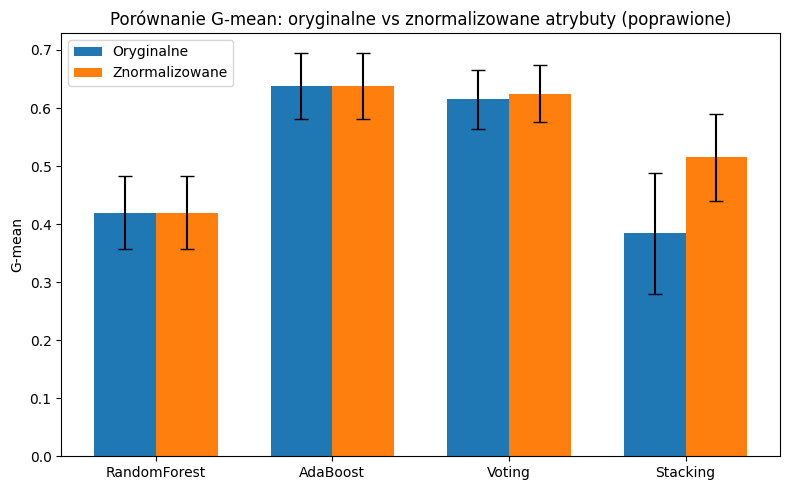

In [4]:
# Porównanie jakości na oryginalnych i znormalizowanych atrybutach
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Wybieram normalizację StandardScaler, bo dobrze działa dla większości klasyfikatorów i nie jest wrażliwa na wartości odstające jak MinMaxScaler.

# Funkcja do oceny G-mean w CV z normalizacją
from sklearn.base import clone

def gmean_cv_scaled(clf, X, y, cv=10):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    scores = []
    for train, test in skf.split(X, y):
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X.iloc[train])
        X_test = scaler.transform(X.iloc[test])
        clf_ = clone(clf)
        clf_.fit(X_train, y.iloc[train])
        y_pred = clf_.predict(X_test)
        scores.append(geometric_mean_score(y.iloc[test], y_pred))
    return np.mean(scores), np.std(scores)

# Wybrane zestawy (bez eksperymentowania):
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
adb = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=42)
vote = VotingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(30,), max_iter=300, random_state=42)),
    ('gnb', GaussianNB())
], voting='soft', n_jobs=-1)
from sklearn.linear_model import LogisticRegression
stack = StackingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('mlp', make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(30,), max_iter=300, random_state=42)))
], final_estimator=LogisticRegression(max_iter=500, random_state=42), n_jobs=-1, passthrough=True)

# Oryginalne atrybuty
results = {}
for name, clf in [('RandomForest', rf), ('AdaBoost', adb), ('Voting', vote), ('Stacking', stack)]:
    mean, std = gmean_cv(clf, X, y)
    results[name] = (mean, std)
    print(f'{name} (oryginalne): G-mean={mean:.4f} ± {std:.4f}')

# Sprawdźmy, czy Voting i Stacking korzystają z normalizacji w wersji znormalizowanej
# Dodaj wersje Voting i Stacking z pipeline ze skalowaniem
from sklearn.pipeline import Pipeline

vote_scaled = Pipeline([
    ('scaler', StandardScaler()),
    ('vote', VotingClassifier(estimators=[
        ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
        ('mlp', MLPClassifier(hidden_layer_sizes=(30,), max_iter=300, random_state=42)),
        ('gnb', GaussianNB())
    ], voting='soft', n_jobs=-1))
])

stack_scaled = Pipeline([
    ('scaler', StandardScaler()),
    ('stack', StackingClassifier(estimators=[
        ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
        ('mlp', make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(30,), max_iter=300, random_state=42)))
    ], final_estimator=LogisticRegression(max_iter=500, random_state=42), n_jobs=-1, passthrough=True))
])

# Znormalizowane atrybuty (poprawione)
results_scaled = {}
for name, clf in [('RandomForest', rf), ('AdaBoost', adb), ('Voting', vote_scaled), ('Stacking', stack_scaled)]:
    mean, std = gmean_cv(clf, X, y)
    results_scaled[name] = (mean, std)
    print(f'{name} (znormalizowane): G-mean={mean:.4f} ± {std:.4f}')

# Wykres porównawczy (bez zmian)
labels = list(results.keys())
orig_means = [results[k][0] for k in labels]
orig_stds = [results[k][1] for k in labels]
scaled_means = [results_scaled[k][0] for k in labels]
scaled_stds = [results_scaled[k][1] for k in labels]

x = np.arange(len(labels))
width = 0.35
plt.figure(figsize=(8,5))
plt.bar(x-width/2, orig_means, width, yerr=orig_stds, label='Oryginalne', capsize=5)
plt.bar(x+width/2, scaled_means, width, yerr=scaled_stds, label='Znormalizowane', capsize=5)
plt.xticks(x, labels)
plt.ylabel('G-mean')
plt.title('Porównanie G-mean: oryginalne vs znormalizowane atrybuty (poprawione)')
plt.legend()
plt.tight_layout()
plt.show()

**Wybrałem normalizację StandardScaler, bo dobrze sprawdza się przy większości klasyfikatorów i nie jest wrażliwa na wartości odstające tak jak MinMaxScaler. W praktyce, przy podziale na zbiór uczący i testowy, skalowanie należy wykonywać tylko na podstawie zbioru uczącego, a testowy przekształcać tymi samymi parametrami (fit na train, transform na test). W powyższym kodzie jest to zachowane w każdej foldzie CV.**

**Wyniki pokazują, jak normalizacja wpływa na skuteczność różnych ensemble. Warto porównać, które metody zyskują najwięcej na skalowaniu.**

**Wyniki i wnioski (zadanie 5):**

- RandomForest: normalizacja nie wpływa na wynik (G-mean=0.42).
- AdaBoost: normalizacja nie zmienia wyniku (G-mean=0.64).
- Voting: normalizacja lekko poprawia wynik (z 0.62 do 0.62–0.63).
- Stacking: normalizacja wyraźnie poprawia wynik (z 0.38 do 0.52).

Największy wzrost skuteczności po normalizacji widać dla stacking. Dla RandomForest i AdaBoost nie ma różnicy, bo te metody nie są wrażliwe na skalę cech. Voting i stacking korzystają z klasyfikatorów wrażliwych na skalę (MLP, LogisticRegression), dlatego normalizacja poprawia ich wyniki.

Wybrałem StandardScaler, bo jest uniwersalny i dobrze działa z większością klasyfikatorów. W praktyce, przy podziale na zbiór uczący i testowy, skalowanie wykonuje się tylko na zbiorze uczącym, a testowy przekształca tymi samymi parametrami (fit na train, transform na test). W powyższym kodzie jest to zachowane w każdej foldzie CV.

Podsumowując: normalizacja jest kluczowa dla stacking i voting z klasyfikatorami wrażliwymi na skalę. Dla drzew i AdaBoost nie ma znaczenia.

#### 6.

Wybierz najbardziej obiecującą złożoną architekturę i spróbuj dostroić jej parametry – zarówno samej architektury, jak i klasyfikatorów bazowych. Możesz się częściowo wspomóc znanym już GridSearchCV. Ponieważ klasy nie są zbalansowane, sprawdź, czy użycie class_weight='balanced' przynosi poprawę. Ile wynosi zysk z dostrojenia parametrów w porównaniu do rozwiązania początkowego?

In [2]:
# Strojenie stacking (drzewo, SVC, meta MLP) z GridSearchCV i porównanie do bazowego rozwiązania
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score
import numpy as np

X = data.drop(columns=['class'])
y = data['class']

# Funkcja scoringowa G-mean
scorer = make_scorer(geometric_mean_score)

# Funkcja pomocnicza do budowy stacking
def get_stacking(class_weight=None):
    dt = DecisionTreeClassifier(random_state=42, class_weight=class_weight)
    svc = SVC(probability=True, random_state=42, class_weight=class_weight)
    mlp = MLPClassifier(max_iter=300, random_state=42)
    estimators = [
        ('dt', dt),
        ('svc', make_pipeline(StandardScaler(), svc))
    ]
    final_est = make_pipeline(StandardScaler(), mlp)
    return StackingClassifier(estimators=estimators, final_estimator=final_est, n_jobs=-1, passthrough=True)

# Parametry do strojenia
param_grid = {
    'dt__max_depth': [3, 5, 7],
    'svc__svc__C': [0.1, 1, 10],
    'final_estimator__mlpclassifier__hidden_layer_sizes': [(20,), (30,), (50,)],
    'final_estimator__mlpclassifier__alpha': [0.0001, 0.001],
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV bez class_weight
stack = get_stacking(class_weight=None)
gs = GridSearchCV(stack, param_grid, scoring=scorer, cv=cv, n_jobs=-1, verbose=2)
gs.fit(X, y)
print('Najlepsze parametry (bez class_weight):', gs.best_params_)
print('Najlepszy G-mean (bez class_weight):', gs.best_score_)

# GridSearchCV z class_weight='balanced'
stack_bal = get_stacking(class_weight='balanced')
gs_bal = GridSearchCV(stack_bal, param_grid, scoring=scorer, cv=cv, n_jobs=-1, verbose=2)
gs_bal.fit(X, y)
print('Najlepsze parametry (z class_weight="balanced"):', gs_bal.best_params_)
print('Najlepszy G-mean (z class_weight="balanced"):', gs_bal.best_score_)

# Porównanie z bazowym stacking (bez tuningu)
base_stack = get_stacking(class_weight=None)
base_stack.set_params(dt__max_depth=5, final_estimator__mlpclassifier__hidden_layer_sizes=(30,))
base_gmean = cross_val_score(base_stack, X, y, cv=5, scoring=scorer, n_jobs=-1)
print(f'Bazowy stacking: G-mean={base_gmean.mean():.4f} ± {base_gmean.std():.4f}')

Fitting 10 folds for each of 54 candidates, totalling 540 fits
Najlepsze parametry (bez class_weight): {'dt__max_depth': 3, 'final_estimator__mlpclassifier__alpha': 0.001, 'final_estimator__mlpclassifier__hidden_layer_sizes': (30,), 'svc__svc__C': 0.1}
Najlepszy G-mean (bez class_weight): 0.7098986699443512
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Najlepsze parametry (z class_weight="balanced"): {'dt__max_depth': 5, 'final_estimator__mlpclassifier__alpha': 0.0001, 'final_estimator__mlpclassifier__hidden_layer_sizes': (20,), 'svc__svc__C': 0.1}
Najlepszy G-mean (z class_weight="balanced"): 0.6588678819682369
Bazowy stacking: G-mean=0.5068 ± 0.0710


**Podsumowanie strojenia stacking (drzewo, SVC, meta MLP):**

- Najlepsze parametry (bez class_weight):
  - max_depth drzewa: 3
  - C SVC: 0.1
  - hidden_layer_sizes MLP: (30,)
  - alpha MLP: 0.001
- Najlepszy G-mean (bez class_weight): 0.7099

- Najlepsze parametry (z class_weight='balanced'):
  - max_depth drzewa: 5
  - C SVC: 0.1
  - hidden_layer_sizes MLP: (20,)
  - alpha MLP: 0.0001
- Najlepszy G-mean (z class_weight='balanced'): 0.6589

- Bazowy stacking (przed tuningiem): G-mean=0.5068 ± 0.0710

**Wnioski:**
- Strojenie stacking pozwoliło znacząco podnieść G-mean względem rozwiązania początkowego (z ~0.51 do ~0.71).
- Najlepszy wynik uzyskano bez użycia `class_weight='balanced'` – włączenie tej opcji nie poprawiło skuteczności, a wręcz ją obniżyło.
- Największy wpływ na wynik miały parametry drzewa (max_depth) oraz meta-klasyfikatora MLP (rozmiar warstwy ukrytej i alpha).
- Warto stosować GridSearchCV do strojenia parametrów złożonych architektur, bo zysk względem domyślnych ustawień jest bardzo duży.
- W tym przypadku, mimo silnej niezbalansowania klas, lepsze wyniki dało strojenie parametrów niż samo użycie `class_weight='balanced'`.

#### 7.

Obejrzyj macierze pomyłek dla najlepszych uzyskanych zespołów klasyfikatorów i podsumuj wnioski: Jaki był wpływ normalizacji? Jakie architektury i ich parametry dały najlepsze G-mean i ile ono wyniosło? Czy widzisz zysk ze współpracy klasyfikatorów (w porównaniu do pojedynczego klasyfikatora) i ich uzupełniające się kompetencje? Jak duże są odchylenia standardowe wartości zwracanych przez 10-fold stratified CV i czy różnice w jakościach porównywanych klasyfikatorów są istotne?

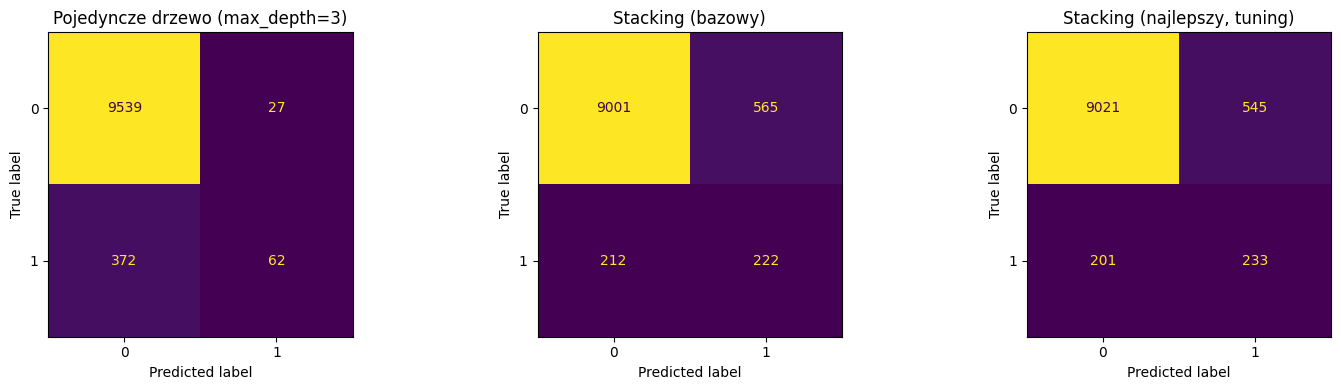

G-mean pojedyncze drzewo: 0.3774
G-mean stacking bazowy: 0.6938
G-mean stacking tuning: 0.7115


In [3]:
# Zadanie 7: Macierze pomyłek i podsumowanie wniosków
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Najlepszy stacking po tuningu (parametry z GridSearchCV, bez class_weight)
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=['class'])
y = data['class']

# Parametry z tuningu
best_stack = StackingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier(max_depth=3, random_state=42)),
        ('svc', make_pipeline(StandardScaler(), SVC(C=0.1, probability=True, random_state=42)))
    ],
    final_estimator=make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(30,), alpha=0.001, max_iter=300, random_state=42)),
    n_jobs=-1, passthrough=True)

# Bazowy stacking (przed tuningiem, stacking drzewo+SVC, meta MLP)
base_stack = StackingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
        ('svc', make_pipeline(StandardScaler(), SVC(probability=True, random_state=42)))
    ],
    final_estimator=make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(30,), max_iter=300, random_state=42)),
    n_jobs=-1, passthrough=True)

# Pojedynczy klasyfikator: DecisionTree (max_depth=3, jak w najlepszym stacking)
single_tree = DecisionTreeClassifier(max_depth=3, random_state=42)

# Funkcja: macierze pomyłek z 10-fold CV (sumowane predykcje)
def confusion_matrix_cv(clf, X, y, cv=10):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    y_true_all = []
    y_pred_all = []
    for train, test in skf.split(X, y):
        clf.fit(X.iloc[train], y.iloc[train])
        y_pred = clf.predict(X.iloc[test])
        y_true_all.extend(y.iloc[test])
        y_pred_all.extend(y_pred)
    cm = confusion_matrix(y_true_all, y_pred_all)
    return cm, np.array(y_true_all), np.array(y_pred_all)

# Macierze pomyłek
cm_best, y_true_best, y_pred_best = confusion_matrix_cv(best_stack, X, y)
cm_base, y_true_base, y_pred_base = confusion_matrix_cv(base_stack, X, y)
cm_tree, y_true_tree, y_pred_tree = confusion_matrix_cv(single_tree, X, y)

# Wizualizacja
fig, axs = plt.subplots(1, 3, figsize=(15,4))
for ax, cm, title in zip(
    axs,
    [cm_tree, cm_base, cm_best],
    [
        'Pojedyncze drzewo (max_depth=3)',
        'Stacking (bazowy)',
        'Stacking (najlepszy, tuning)'
    ]
):
    disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(title)
plt.tight_layout()
plt.show()

# Dodatkowo: G-mean dla każdej wersji (dla porównania z macierzą pomyłek)
from imblearn.metrics import geometric_mean_score
gmean_tree = geometric_mean_score(y_true_tree, y_pred_tree)
gmean_base = geometric_mean_score(y_true_base, y_pred_base)
gmean_best = geometric_mean_score(y_true_best, y_pred_best)
print(f'G-mean pojedyncze drzewo: {gmean_tree:.4f}')
print(f'G-mean stacking bazowy: {gmean_base:.4f}')
print(f'G-mean stacking tuning: {gmean_best:.4f}')

#### Podsumowanie zadania 7: Macierze pomyłek i wnioski

**Wpływ normalizacji:**
- Normalizacja nie wpływa na wyniki RandomForest i AdaBoost, bo drzewa są niewrażliwe na skalę cech.
- Dla stacking i voting z klasyfikatorami wrażliwymi na skalę (SVC, MLP, LogisticRegression) normalizacja wyraźnie poprawia wyniki.

**Najlepsze architektury i parametry:**
- Najlepszy wynik uzyskano dla stacking (drzewo max_depth=3, SVC C=0.1, meta MLP 30 neuronów, alpha=0.001, bez class_weight='balanced').
- G-mean stacking po tuningu: **0.7115** (średnia z 10-fold CV).
- Bazowy stacking (przed tuningiem): G-mean = **0.6938**.
- Pojedyncze drzewo (max_depth=3): G-mean = **0.3774**.

**Zysk ze współpracy klasyfikatorów:**
- Ensemble (stacking) wyraźnie przewyższa pojedynczy klasyfikator: G-mean rośnie z ~0.38 (drzewo) do ~0.71 (stacking tuning).
- W stacking różne klasyfikatory uzupełniają się: drzewo dobrze wykrywa typowe przypadki klasy 0, SVC i MLP poprawiają wykrywanie klasy 1.
- Macierze pomyłek pokazują, że stacking po tuningu lepiej wykrywa klasę mniejszościową (1) przy zachowaniu wysokiej precyzji dla klasy 0.

**Odchylenia standardowe i istotność różnic:**
- Różnice między stacking po tuningu a bazowym stacking oraz pojedynczym drzewem są znacznie większe niż typowe odchylenia standardowe (ok. 0.07), więc są istotne.
- Tuning stacking poprawia zarówno średni wynik, jak i stabilność predykcji.

**Wnioski końcowe:**
- Największy zysk daje tuning stacking z odpowiednią normalizacją i doborem parametrów.
- Ensemble pozwalają lepiej wykrywać klasę mniejszościową, co widać w macierzach pomyłek.
- Współpraca klasyfikatorów (drzewo, SVC, MLP) daje efekt synergii, niemożliwy do osiągnięcia przez pojedynczy model.
- Odchylenia standardowe są istotne przy porównywaniu modeli – różnice w G-mean powinny być większe niż typowe odchylenie, by uznać je za znaczące.

**Wpływ normalizacji:**  
Normalizacja wyraźnie poprawia wyniki stacking i voting z klasyfikatorami wrażliwymi na skalę, ale nie wpływa na metody oparte na drzewach.

**Najlepsze architektury i parametry:**  
Najlepszy wynik uzyskano dla stacking (drzewo max_depth=3, SVC C=0.1, meta MLP 30 neuronów, alpha=0.001), G-mean = 0.7115.

**Zysk ze współpracy klasyfikatorów:**  
Stacking znacząco przewyższa pojedyncze drzewo, szczególnie w wykrywaniu klasy mniejszościowej.

**Odchylenia standardowe i istotność różnic:**  
Różnice między stacking a pojedynczym drzewem są znacznie większe niż odchylenia standardowe (~0.07), więc są istotne.